## Packages and models

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

from fft_conv_pytorch import FFTConv1d, FFTConv2d, FFTConv3d
from models.LeNet import LeNet
from models.AlexNet import AlexNet
from models.GoogLeNet import GoogLeNet

## Test of inference speed of Fast Fourier Transform Convolution for dimension 1, 2 and 3 for different kernel sizes



In [45]:
def benchmark_1d():
    input_data = torch.randn(1, 3, 4096)
    times_with_fourier = []
    times_without_fourier = []
    list_norms = []
    
    for kernel in range(1, 500, 10):
        sublist_with_fourier = []
        sublist_without_fourier = []
        sublist_norm = []
        
        for _ in range(10):
            conv_fourier = FFTConv1d(3, 4, kernel, stride=1, padding=0)
            kernel_weight = conv_fourier.weight
            kernel_bias = conv_fourier.bias
            
            conv = torch.nn.Conv1d(3, 4, kernel, stride=1, padding=0)
            conv.weight = torch.nn.Parameter(kernel_weight)
            conv.bias = torch.nn.Parameter(kernel_bias)
            
            torch.mps.synchronize()
            
            t0 = torch.mps.Event(enable_timing=True)
            t1 = torch.mps.Event(enable_timing=True)
            
            t0.record()
            output_fourier = conv_fourier(input_data)
            t1.record()
            torch.mps.synchronize()
            
            sublist_with_fourier.append(t0.elapsed_time(t1))
            
            t0 = torch.mps.Event(enable_timing=True)
            t1 = torch.mps.Event(enable_timing=True)
            
            t0.record()
            output = conv(input_data)
            t1.record()
            torch.mps.synchronize()
            
            sublist_without_fourier.append(t0.elapsed_time(t1))
            sublist_norm.append(torch.norm(output - output_fourier))
        
        times_with_fourier.append(sublist_with_fourier)
        times_without_fourier.append(sublist_without_fourier)
        list_norms.append(torch.mean(torch.tensor(sublist_norm)))
    
    return times_without_fourier, times_with_fourier, list_norms

In [46]:
benchmark = benchmark_1d()

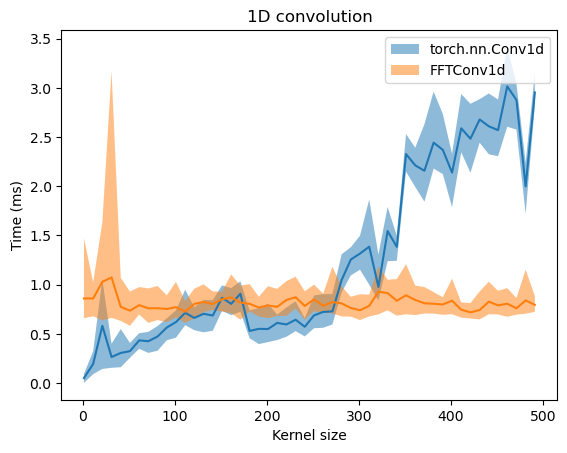

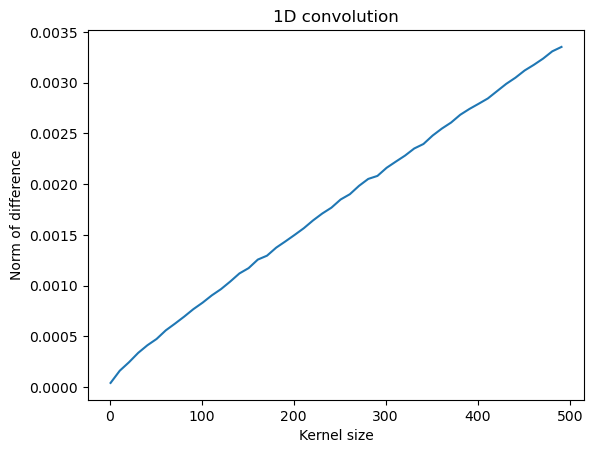

In [47]:
plt.figure()
plt.fill_between(range(1, 500, 10), [min(x) for x in benchmark[0]], [max(x) for x in benchmark[0]], alpha=0.5, label='torch.nn.Conv1d')
plt.plot(range(1, 500, 10), [sum(x)/len(x) for x in benchmark[0]])
plt.fill_between(range(1, 500, 10), [min(x) for x in benchmark[1]], [max(x) for x in benchmark[1]], alpha=0.5, label='FFTConv1d')
plt.plot(range(1, 500, 10), [sum(x)/len(x) for x in benchmark[1]])
plt.xlabel('Kernel size')
plt.ylabel('Time (ms)')
plt.title('1D convolution')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(1, 500, 10), benchmark[2])
plt.xlabel('Kernel size')
plt.ylabel('Norm of difference')
plt.title('1D convolution')
plt.show()

In [2]:
def benchmark_2d():
    input_data = torch.randn(1, 3, 512, 512)
    times_with_fourier = []
    times_without_fourier = []
    list_norms = []
    
    for kernel in range(1, 50, 5):
        sublist_with_fourier = []
        sublist_without_fourier = []
        sublist_norm = []
        
        for _ in range(10):
            conv_fourier = FFTConv2d(3, 4, kernel, stride=1, padding=0)
            kernel_weight = conv_fourier.weight
            kernel_bias = conv_fourier.bias
            
            conv = torch.nn.Conv2d(3, 4, kernel, stride=1, padding=0)
            conv.weight = torch.nn.Parameter(kernel_weight)
            conv.bias = torch.nn.Parameter(kernel_bias)
            
            torch.mps.synchronize()
            
            t0 = torch.mps.Event(enable_timing=True)
            t1 = torch.mps.Event(enable_timing=True)
            
            t0.record()
            output_fourier = conv_fourier(input_data)
            t1.record()
            torch.mps.synchronize()
            
            sublist_with_fourier.append(t0.elapsed_time(t1))
            
            t0 = torch.mps.Event(enable_timing=True)
            t1 = torch.mps.Event(enable_timing=True)
            
            t0.record()
            output = conv(input_data)
            t1.record()
            torch.mps.synchronize()
            
            sublist_without_fourier.append(t0.elapsed_time(t1))
            sublist_norm.append(torch.norm(output - output_fourier))
        
        times_with_fourier.append(sublist_with_fourier)
        times_without_fourier.append(sublist_without_fourier)
        list_norms.append(torch.mean(torch.tensor(sublist_norm)))
    
    return times_without_fourier, times_with_fourier, list_norms

In [5]:
benchmark = benchmark_2d()

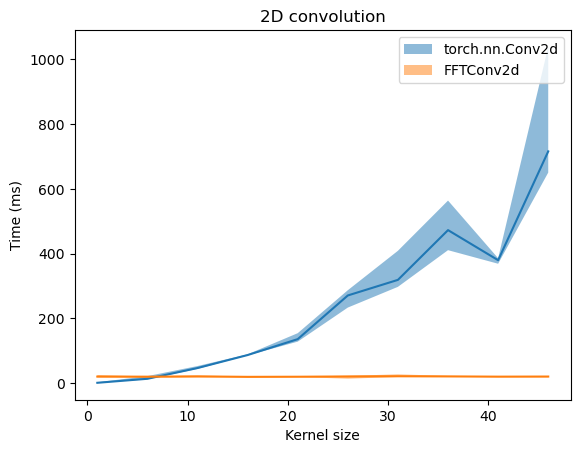

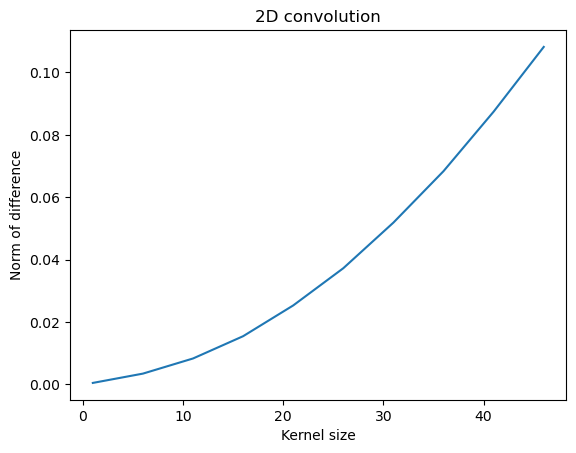

In [6]:
plt.figure()
plt.fill_between(range(1, 50, 5), [min(x) for x in benchmark[0]], [max(x) for x in benchmark[0]], alpha=0.5, label='torch.nn.Conv2d')
plt.plot(range(1, 50, 5), [sum(x)/len(x) for x in benchmark[0]])
plt.fill_between(range(1, 50, 5), [min(x) for x in benchmark[1]], [max(x) for x in benchmark[1]], alpha=0.5, label='FFTConv2d')
plt.plot(range(1, 50, 5), [sum(x)/len(x) for x in benchmark[1]])
plt.xlabel('Kernel size')
plt.ylabel('Time (ms)')
plt.title('2D convolution')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(1, 50, 5), benchmark[2])
plt.xlabel('Kernel size')
plt.ylabel('Norm of difference')
plt.title('2D convolution')
plt.show()

In [58]:
def benchmark_3d():
    input_data = torch.randn(1, 3, 64, 64, 64)
    times_with_fourier = []
    times_without_fourier = []
    list_norms = []
    
    for kernel in range(1, 10, 1):
        sublist_with_fourier = []
        sublist_without_fourier = []
        sublist_norm = []
        
        for _ in range(10):
            conv_fourier = FFTConv3d(3, 4, kernel, stride=1, padding=0)
            kernel_weight = conv_fourier.weight
            kernel_bias = conv_fourier.bias
            
            conv = torch.nn.Conv3d(3, 4, kernel, stride=1, padding=0)
            conv.weight = torch.nn.Parameter(kernel_weight)
            conv.bias = torch.nn.Parameter(kernel_bias)
            
            torch.mps.synchronize()
            
            t0 = torch.mps.Event(enable_timing=True)
            t1 = torch.mps.Event(enable_timing=True)
            
            t0.record()
            output_fourier = conv_fourier(input_data)
            t1.record()
            torch.mps.synchronize()
            
            sublist_with_fourier.append(t0.elapsed_time(t1))
            
            t0 = torch.mps.Event(enable_timing=True)
            t1 = torch.mps.Event(enable_timing=True)
            
            t0.record()
            output = conv(input_data)
            t1.record()
            torch.mps.synchronize()
            
            sublist_without_fourier.append(t0.elapsed_time(t1))
            sublist_norm.append(torch.norm(output - output_fourier))
        
        times_with_fourier.append(sublist_with_fourier)
        times_without_fourier.append(sublist_without_fourier)
        list_norms.append(torch.mean(torch.tensor(sublist_norm)))
    
    return times_without_fourier, times_with_fourier, list_norms

In [59]:
benchmark = benchmark_3d()

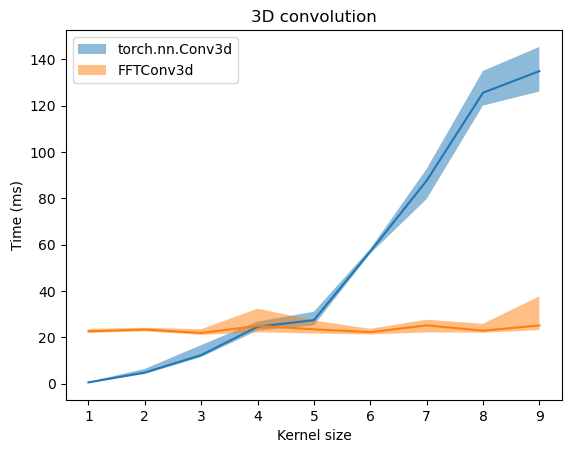

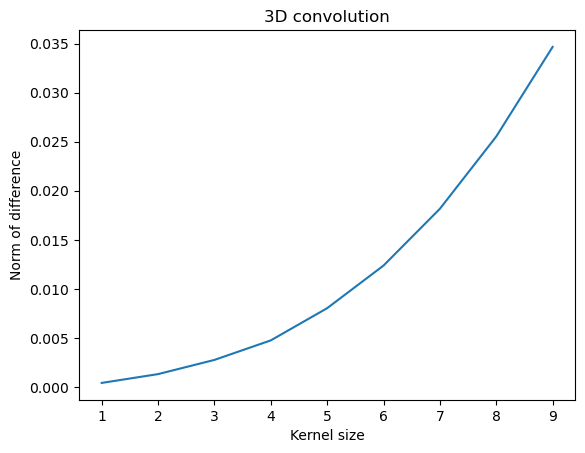

In [60]:
plt.figure()
plt.fill_between(range(1, 10, 1), [min(x) for x in benchmark[0]], [max(x) for x in benchmark[0]], alpha=0.5, label='torch.nn.Conv3d')
plt.plot(range(1, 10, 1), [sum(x)/len(x) for x in benchmark[0]])
plt.fill_between(range(1, 10, 1), [min(x) for x in benchmark[1]], [max(x) for x in benchmark[1]], alpha=0.5, label='FFTConv3d')
plt.plot(range(1, 10, 1), [sum(x)/len(x) for x in benchmark[1]])
plt.xlabel('Kernel size')
plt.ylabel('Time (ms)')
plt.title('3D convolution')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(1, 10, 1), benchmark[2])
plt.xlabel('Kernel size')
plt.ylabel('Norm of difference')
plt.title('3D convolution')
plt.show()

## Comparison of inference speed for different basic models 

In [3]:
models = [LeNet, AlexNet, GoogLeNet]
bools = [False, True]

benchmark = {'models':['LeNet', 'AlexNet', 'GoogLeNet'],
             'FFC':[],
             'no FFC':[]}

for model in models:
    for is_fourier in bools:
        if model == LeNet:
            x = torch.randn(10, 1, 28, 28)
        else:
            x = torch.randn(10, 3, 227, 227)
        net = model(fourier=is_fourier)
        torch.mps.synchronize()
        t0 = torch.mps.Event(enable_timing=True)
        t1 = torch.mps.Event(enable_timing=True)
        t0.record()
        out = net(x)
        t1.record()
        torch.mps.synchronize()
        if is_fourier:
            benchmark['FFC'].append(t0.elapsed_time(t1))
        else:
            benchmark['no FFC'].append(t0.elapsed_time(t1))

benchmark = pd.DataFrame(benchmark)
benchmark.index = benchmark['models']
benchmark.drop(columns=['models'], inplace=True)

title = "Time of Forward Passes for AlexNet and GoogLeNet with and without FFC"
print(title)
benchmark

Time of Forward Passes for AlexNet and GoogLeNet with and without FFC


,FFC,no FFC
models,,
LeNet,4.992375,1.470750
AlexNet,899.968167,58.646042
GoogLeNet,2458.010042,253.503959
